# Exploring Data to Get High Level Statistics

In [44]:
from __future__ import division
#import required modules
import pandas as pd 
from IPython.display import display
import numpy as np
#matplotlib for additional coustomization
from matplotlib import pyplot as plt
%matplotlib inline

#seaborn for plotting and styling
import seaborn as sns
# to supress printing of exponential notation in pandas
pd.options.display.float_format = '{:20,.2f}'.format

In [45]:
#helper functions
def getPecentage(df1, df2):
    return df1.shape[0] / df2.shape[0] * 100

def bold(text_to_bold):
    """
    Bolds given string.
    args:todo
    returns:todo
    """
    bold = "\033[1m"
    reset = "\033[0;0m"
    return bold + text_to_bold + reset

def count_plot(column, axis, df, percent, title='', figsize=(16,3)):
    total_rows = df.shape[0]
    plt.figure(figsize=figsize)
    if axis == 'x':
        ax = sns.countplot(x=column, data=df)
    elif axis == 'y':
        ax = sns.countplot(y=column, data=df)
    
#     ax.title = title
    
    if percent == 'show' and axis != 'y':
        for p in ax.patches:
            height=p.get_height()
            percent = (height*100)/total_rows
            total_percent = (height*100)/totalrows
#             ax.text((p.get_x() + p.get_width()/2), p.get_height()+250, '{:1.1f} %'.format(percent), ha='center')
            ax.text((p.get_x() + p.get_width()/2), p.get_height(), '{:1.1f} %'.format(percent) + ' / ' + '{:1.1f} %'.format(total_percent), ha='center')
            
def showAirbagStats(d, data):
    filter_ = (d.D_airbagAvail == 'yes') & (d.airbagAvail == 'yes')
    airbag_data = d[filter_]
    
    condition = ['Airbag Avail (Both)', 'Psngr\'s MF', 'Drvr\'s MF', 'Both\'s MF']
    percentage = []
    
#     print 'Both had airbag Avail: ', getPecentage(airbag_data, data), '%'
    percentage.append(getPecentage(airbag_data, data))
    
    filter_ = (airbag_data.D_airbagDeploy == 'yes') & (airbag_data.airbagDeploy == 'no')
# print 'ONLY Passenger\'s airbag malfucntioned ', getPecentage(airbag_data[filter_], data), '%'
    percentage.append(getPecentage(airbag_data[filter_], data))
    
    filter_ = (airbag_data.D_airbagDeploy == 'no') & (airbag_data.airbagDeploy == 'yes')
    # print 'ONLY Driver\'s airbag malfucntioned ', getPecentage(airbag_data[filter_], data), '%'
    percentage.append(getPecentage(airbag_data[filter_], data))

    filter_ = (data.D_airbagDeploy == 'no') & (data.airbagDeploy == 'no')
    # print 'Both\'s airbag malfucntioned ', getPecentage(airbag_data[filter_], data), '%'
    percentage.append(getPecentage(airbag_data[filter_], data))
    
    df = pd.DataFrame()
    df['condition'] = condition
    df['percentage'] = percentage
    return df

### Loading data

In [46]:
data = pd.read_csv('data/FARS.csv')
data = data.drop(labels=['Unnamed: 0'], axis=1)
print "Data shape:"
print "{} Rows x {} Columns".format(str(data.shape[0]), str(data.shape[1]))
data.head(10)

totalrows = len(data.index)

Data shape:
151158 Rows x 17 Columns


## Let's see the distribution of inimpact position

### inimpact: location code of initial impact


total impact points:  24


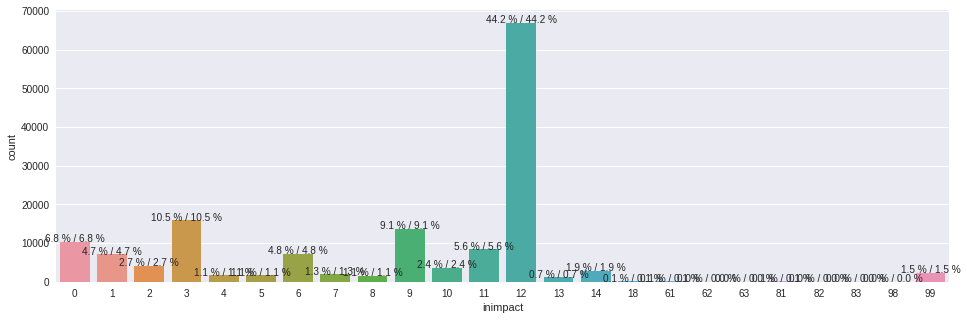

In [47]:
print 'total impact points: ', len(data.inimpact.value_counts().keys())
count_plot('inimpact', 'x', data, 'show', 'Impact dist in accidents', figsize=(16,5))

**44%** of the accidents by the inimpact **12** (front)

**20%** by inimpact **3** and **9**

### Lets dig down more to see why 44% of the accidents by inimpact 12

In [48]:
filter_ = (data.inimpact == 12)
data_specific_inimpact = data[filter_]

### About Seatbelt (When car hit from front and airbag didn't deploy)

#### Stats for Passenger 

When seatbelt was fastened

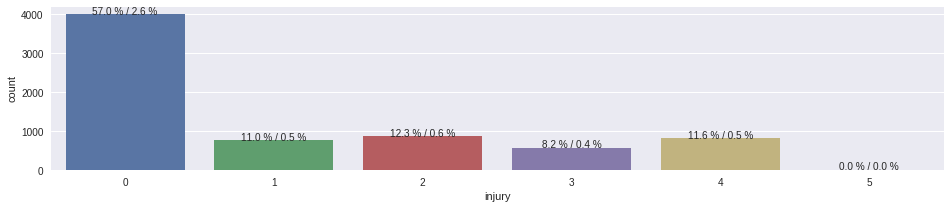

In [49]:
filter_p = (data_specific_inimpact.airbagDeploy == 'no') & (data_specific_inimpact.airbagAvail == 'yes') \
        & (data_specific_inimpact.Restraint == 'yes')
count_plot('injury', 'x', data_specific_inimpact[filter_p], 'show')

When seatbelt wasn't fastened

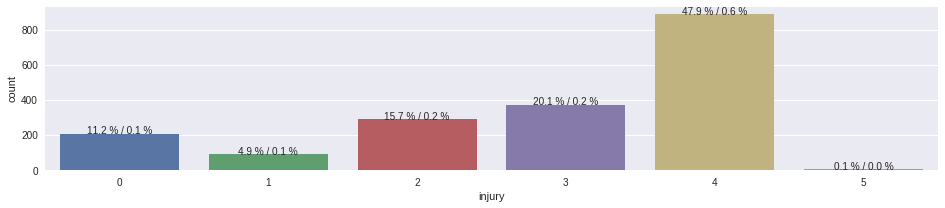

In [50]:
filter_p = (data_specific_inimpact.airbagDeploy == 'no') & (data_specific_inimpact.airbagAvail == 'yes') \
        & (data_specific_inimpact.Restraint == 'no')
count_plot('injury', 'x', data_specific_inimpact[filter_p], 'show')

Graphs showed that seatbelt helpd in survival when car hit from front and airbag didn't deploy

In most of the incidents, when inimpact was 12 and airbag malfunctioned, both passenger and driver were not fastening the seatbelt.

#### Stats for Driver

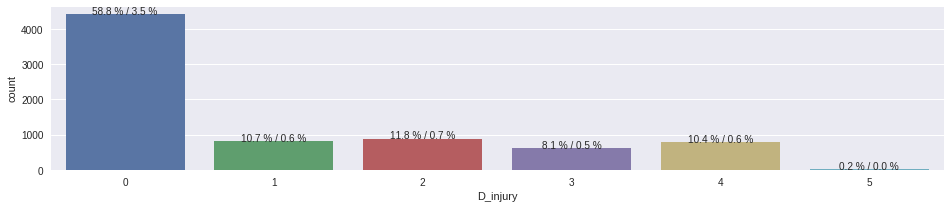

In [51]:
filter_p = (data_specific_inimpact.D_airbagDeploy == 'no') & (data_specific_inimpact.D_airbagAvail == 'yes') \
           & (data_specific_inimpact.D_Restraint == 'yes')
totalrows = len(data[data.D_injury != 0])
count_plot('D_injury', 'x', data_specific_inimpact[filter_p], 'show')

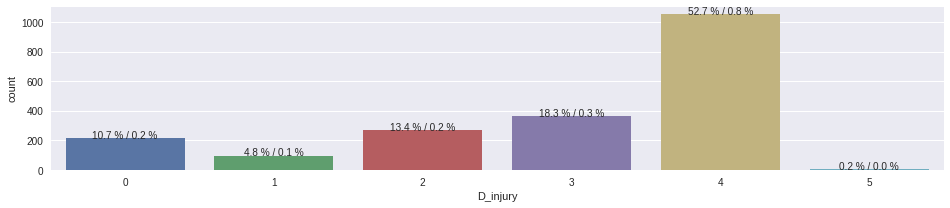

In [52]:
filter_p = (data_specific_inimpact.D_airbagDeploy == 'no') & (data_specific_inimpact.D_airbagAvail == 'yes') \
            & (data_specific_inimpact.D_Restraint == 'no')
count_plot('D_injury', 'x', data_specific_inimpact[filter_p], 'show')

Same is the insight for driver. It shows that seatbelt helped from death even if airbag don't deploy

### Effects of  Airbag

#### Lets see the type of airbag that deployed in case of impact 12

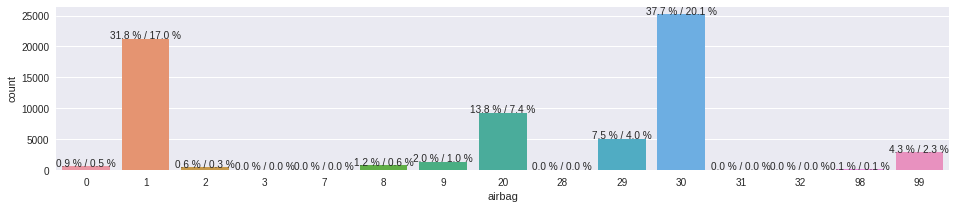

In [53]:
count_plot('airbag', 'x', data_specific_inimpact, 'show')

In **37%** cases, there **wasn't** any airbag **installed** in the car for **both** driver and the passenger.

In **31%** cases where airbag **1** (front) were the airbags that were **deployed**.

In **14%** cases, airbags were installed but **couldn't deployed**

### Airbags deployed successfully? (Available for both passenger and the driver)

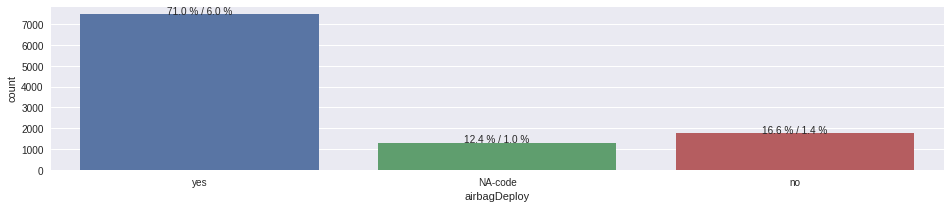

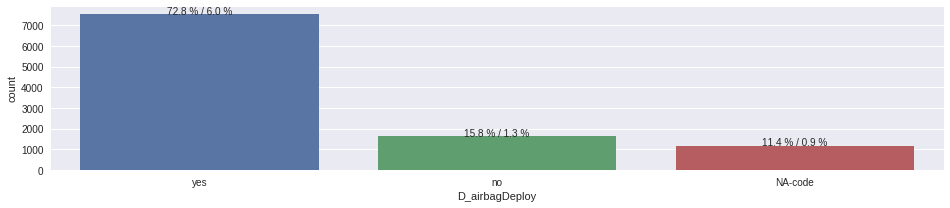

In [54]:
filter_ = (data_specific_inimpact.D_airbagAvail == 'yes') & (data_specific_inimpact.airbagAvail == 'yes')
data_impact_aibagAvail = data_specific_inimpact[filter_]

count_plot('airbagDeploy', 'x', data_impact_aibagAvail[data_impact_aibagAvail.injury == 4], 'show') # passenger's airbag deployement status 
count_plot('D_airbagDeploy', 'x', data_impact_aibagAvail[data_impact_aibagAvail.D_injury == 4], 'show') # driver's airbag deployement status

Around **70%** cases when passenger/driver **died** even when airbag deployed. Seems like airbag didn't help out much to prevent deaths

**16.6%** cases, where **passenger died** and airbag didn't deploy

**15.8%** cases, where **driver died** and airbag didn't work.

#### Lets see some stats about airbag 1 (front deployed for both or not)

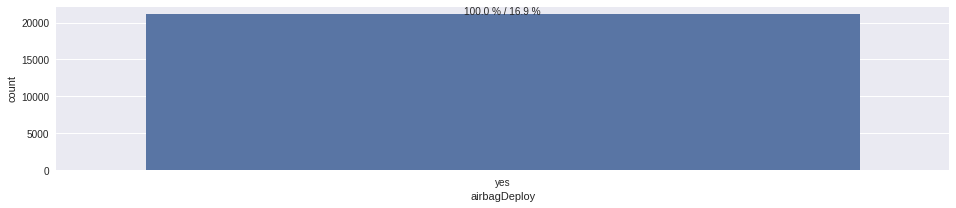

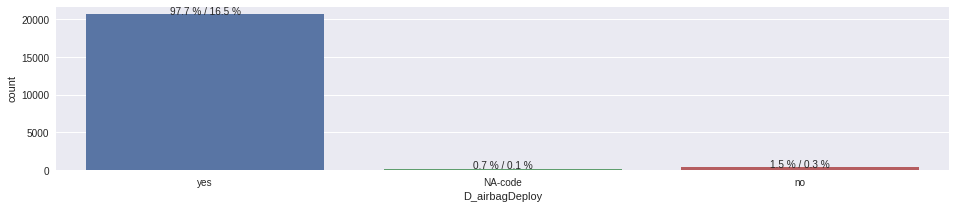

In [55]:
filter_ = (data_specific_inimpact.airbag == 1) & (data_specific_inimpact.airbagAvail == 'yes') & (data_specific_inimpact.D_airbagAvail == 'yes')
data_inimpact_airbag1 = data_specific_inimpact[filter_]
count_plot('airbagDeploy', 'x', data_inimpact_airbag1, 'show')
count_plot('D_airbagDeploy', 'x', data_inimpact_airbag1, 'show')

**14%** cases of inimpact 12, airbag 1:

Paseenger's airbag always worked but driver's aibag malfuntioned **1.5%** of the cases

# WHOLE DATA

### Death's stats

In [56]:
def addDeathType(row):
    if (row.D_injury != 4) & (row.injury != 4):
        return 'None'
    elif (row.D_injury == 4) & (row.injury == 4):
        return 'Both'
    elif (row.D_injury != 4) & (row.injury == 4):
        return 'Psngr'
    else:
        return 'Drvr'
data['death_type'] = data.apply(addDeathType, axis=1)

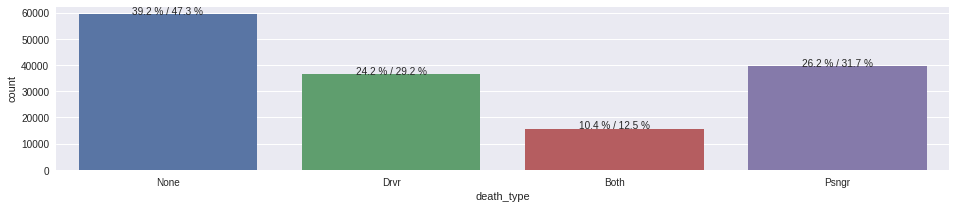

In [57]:
count_plot('death_type', 'x', data, 'show')

40% cases where no one died
Passengers' death ratios are more than drivers'

In [58]:
death_grp_data = data.groupby(['inimpact', 'death_type']).count().reset_index()
death_grp_data.rename(columns={'caseid': 'death_type_count'}, inplace=True)
death_grp_data = death_grp_data[['inimpact', 'death_type', 'death_type_count']]

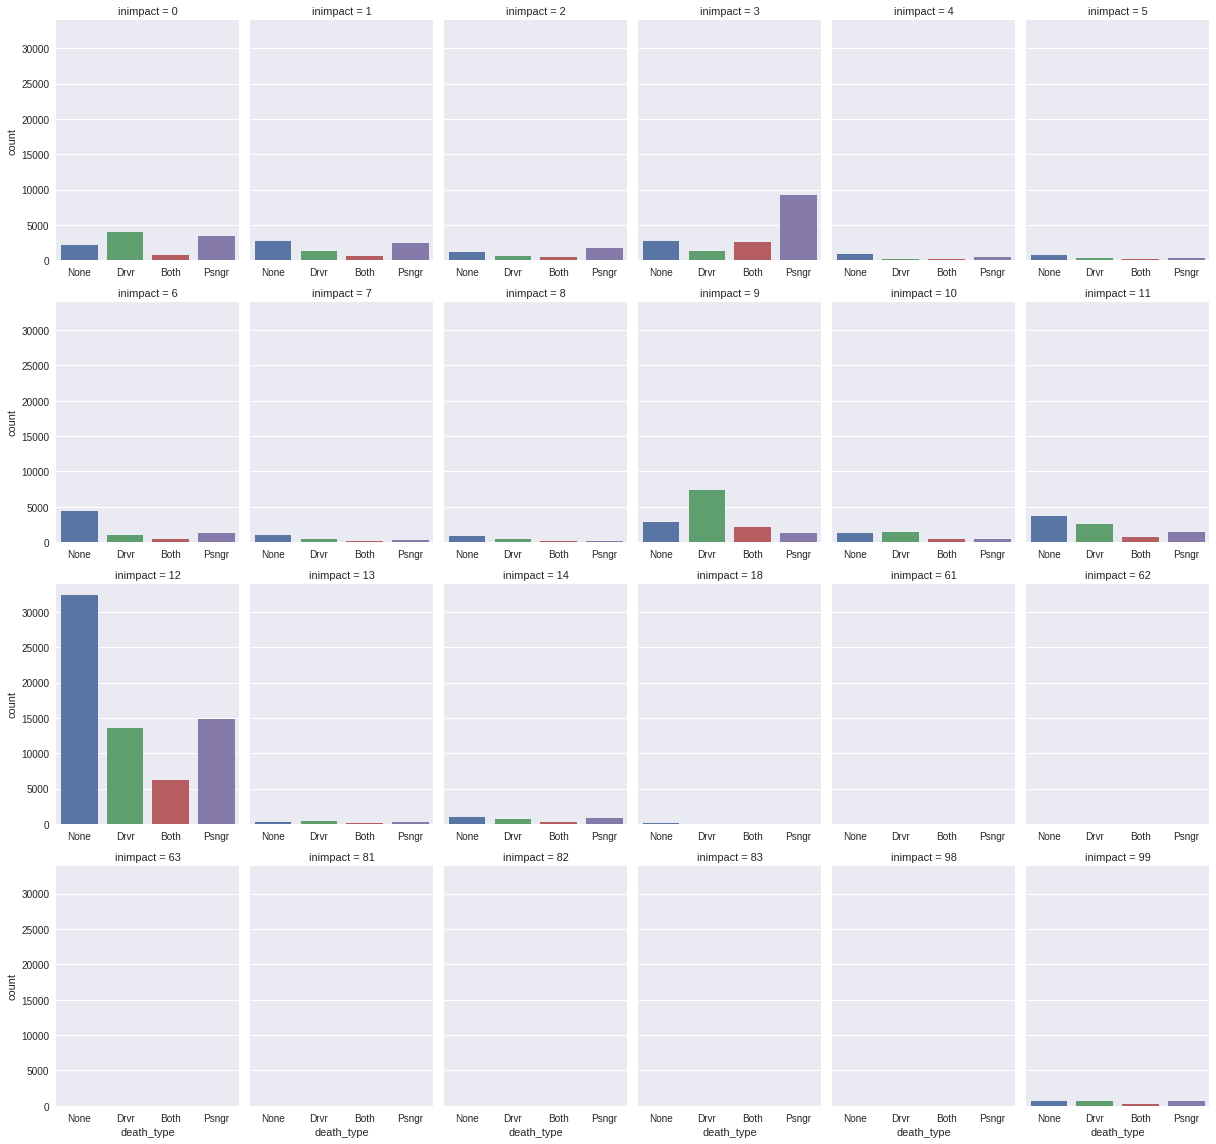

In [59]:
sns.set_style('darkgrid', {'legend.frameon':True})
g = sns.factorplot(x="death_type",
                   col="inimpact", 
                   data=data, col_wrap=6, kind="count", size=4, aspect=0.7,
                   sharex=False
                  )

### Seat belts Yes/No in each state

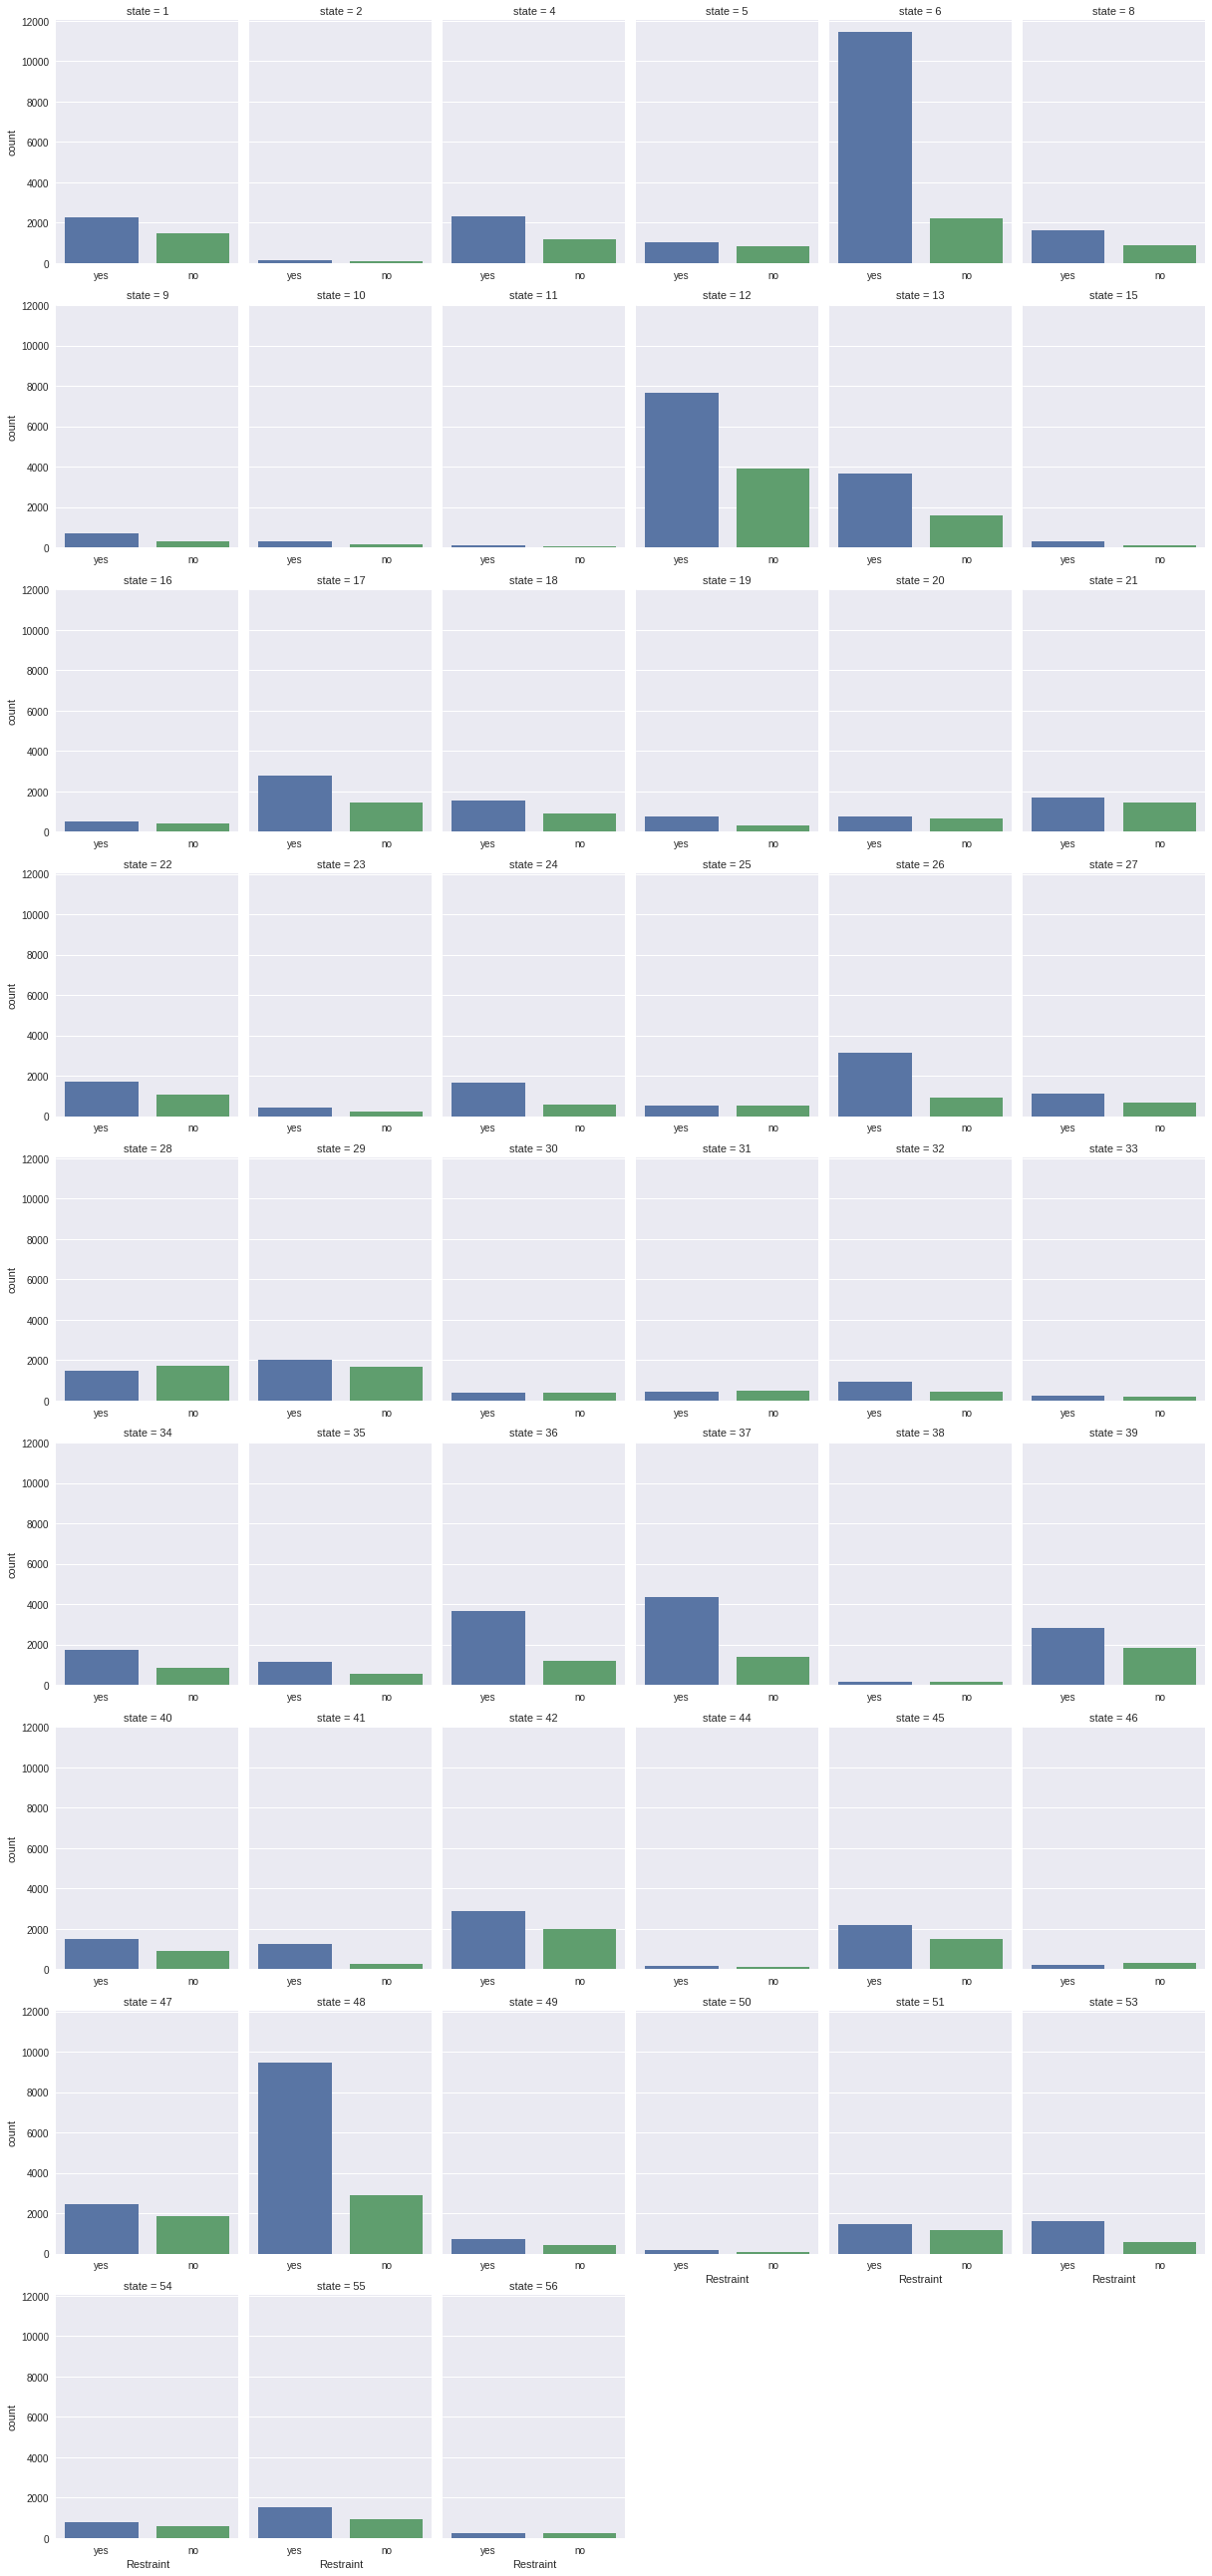

In [60]:
filter_ = (data.Restraint != 'NA-code')
g = sns.factorplot(x="Restraint",
                   col="state", 
                   data=data[filter_], col_wrap=6, kind="count", size=4, aspect=0.7,
                   sharex=False
                  )

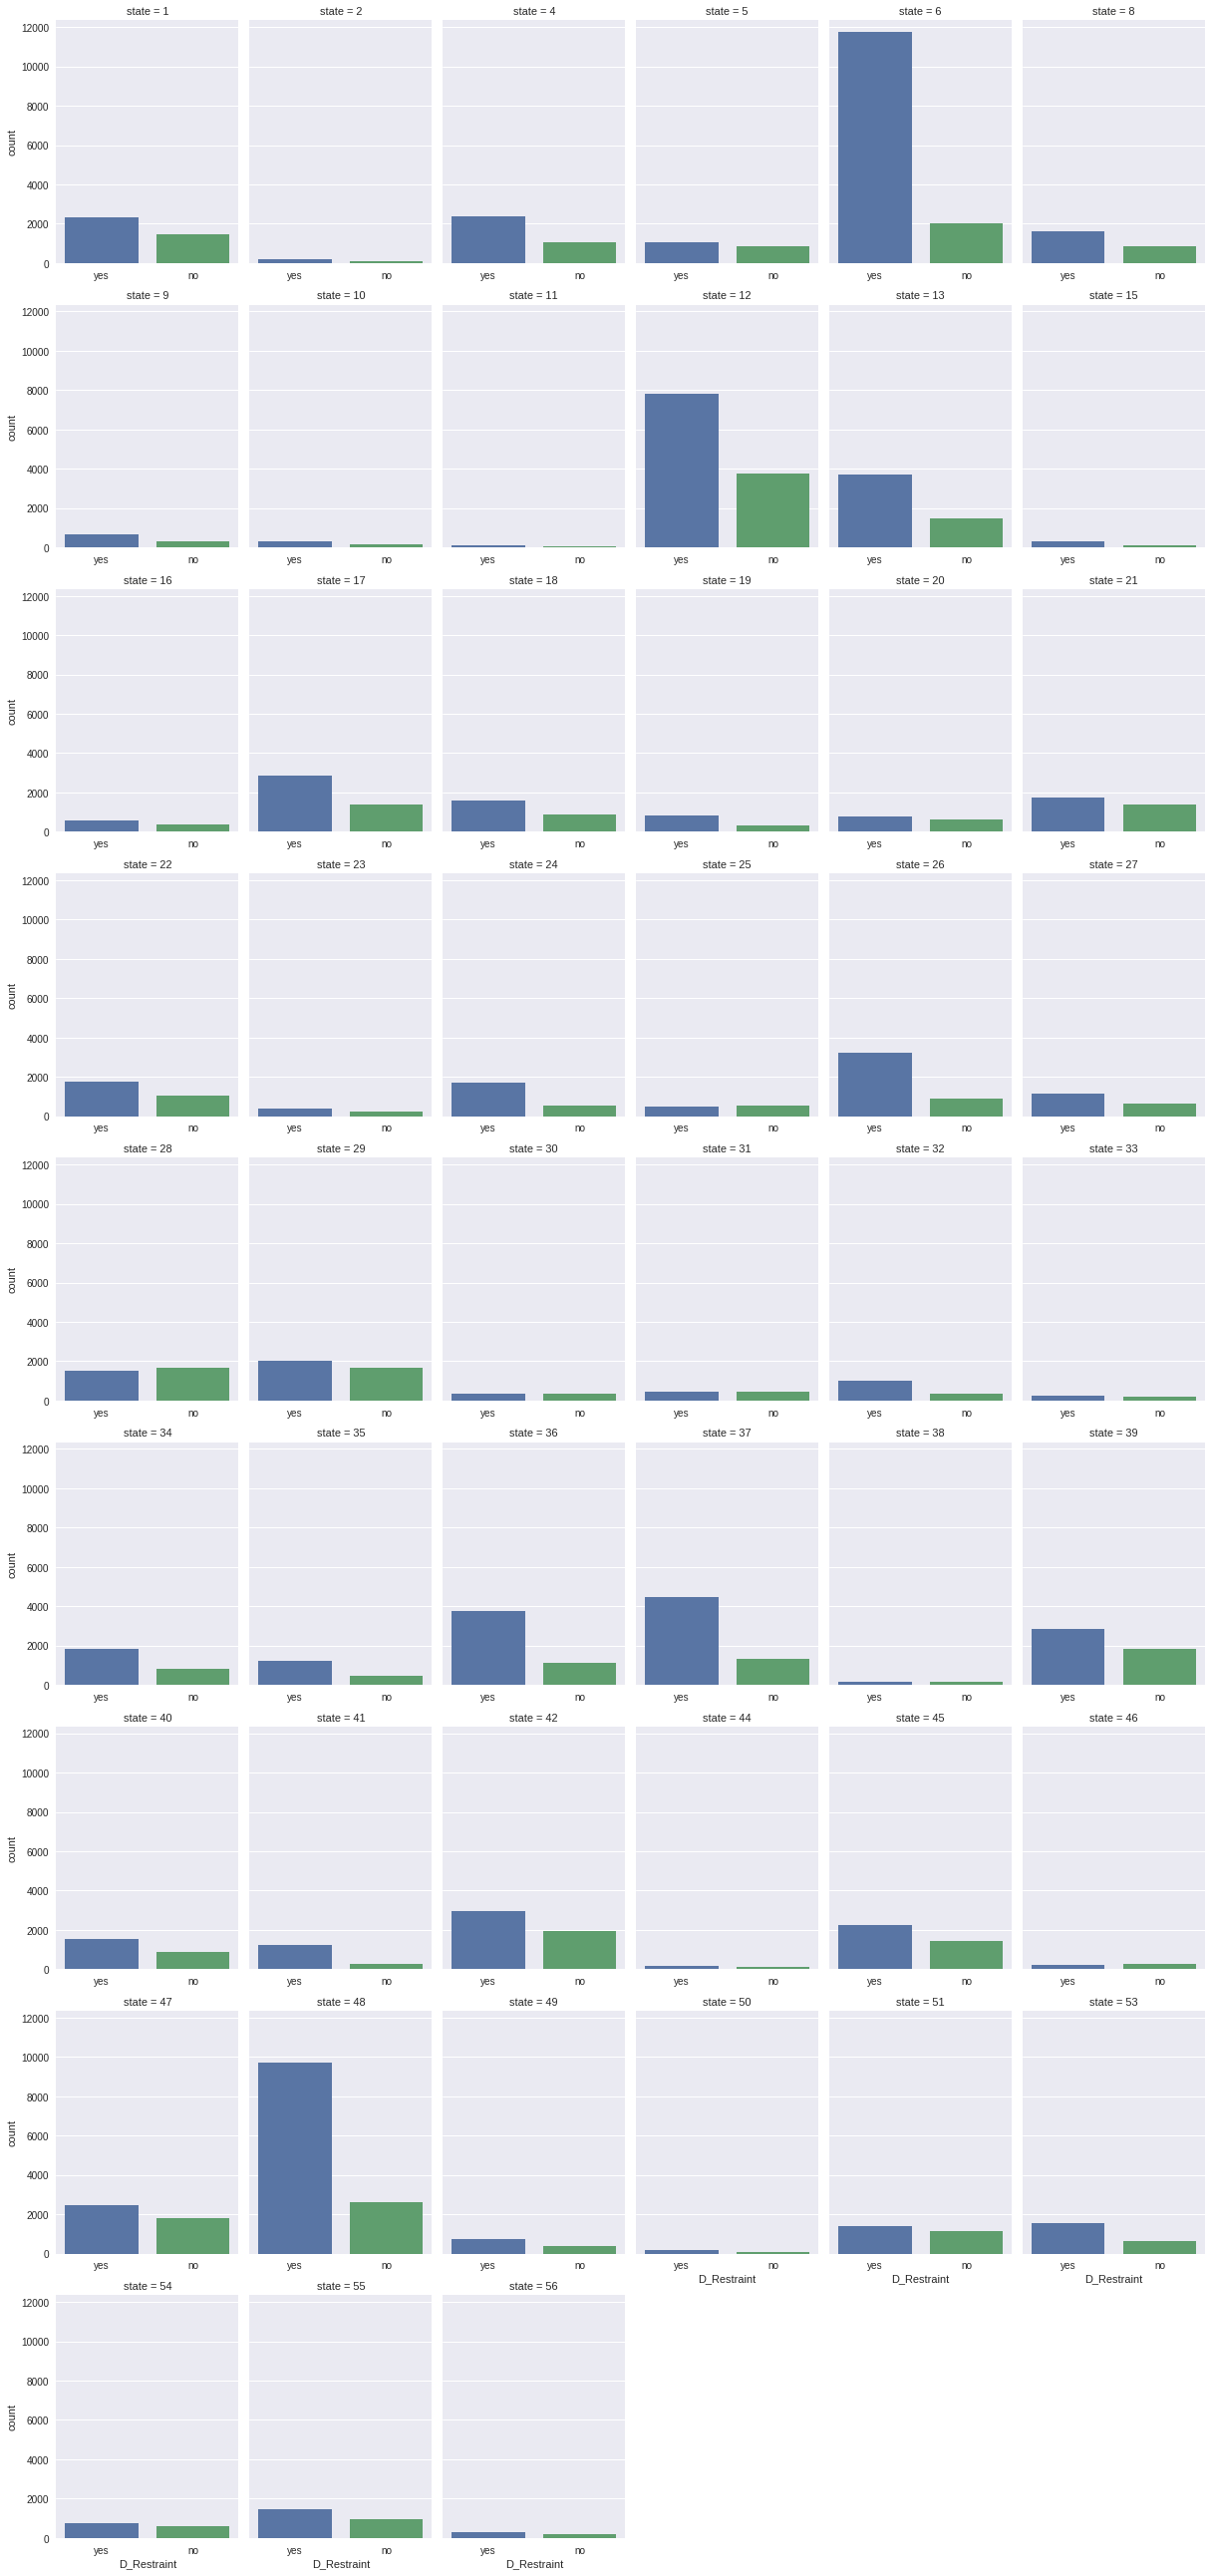

In [61]:
filter_ = (data.D_Restraint != 'NA-code')
g = sns.factorplot(x="D_Restraint",
                   col="state", 
                   data=data[filter_], col_wrap=6, kind="count", size=4, aspect=0.7,
                   sharex=False
                  )

Graph shows that passengers and drivers **don't wear belts** more often in **state 28**

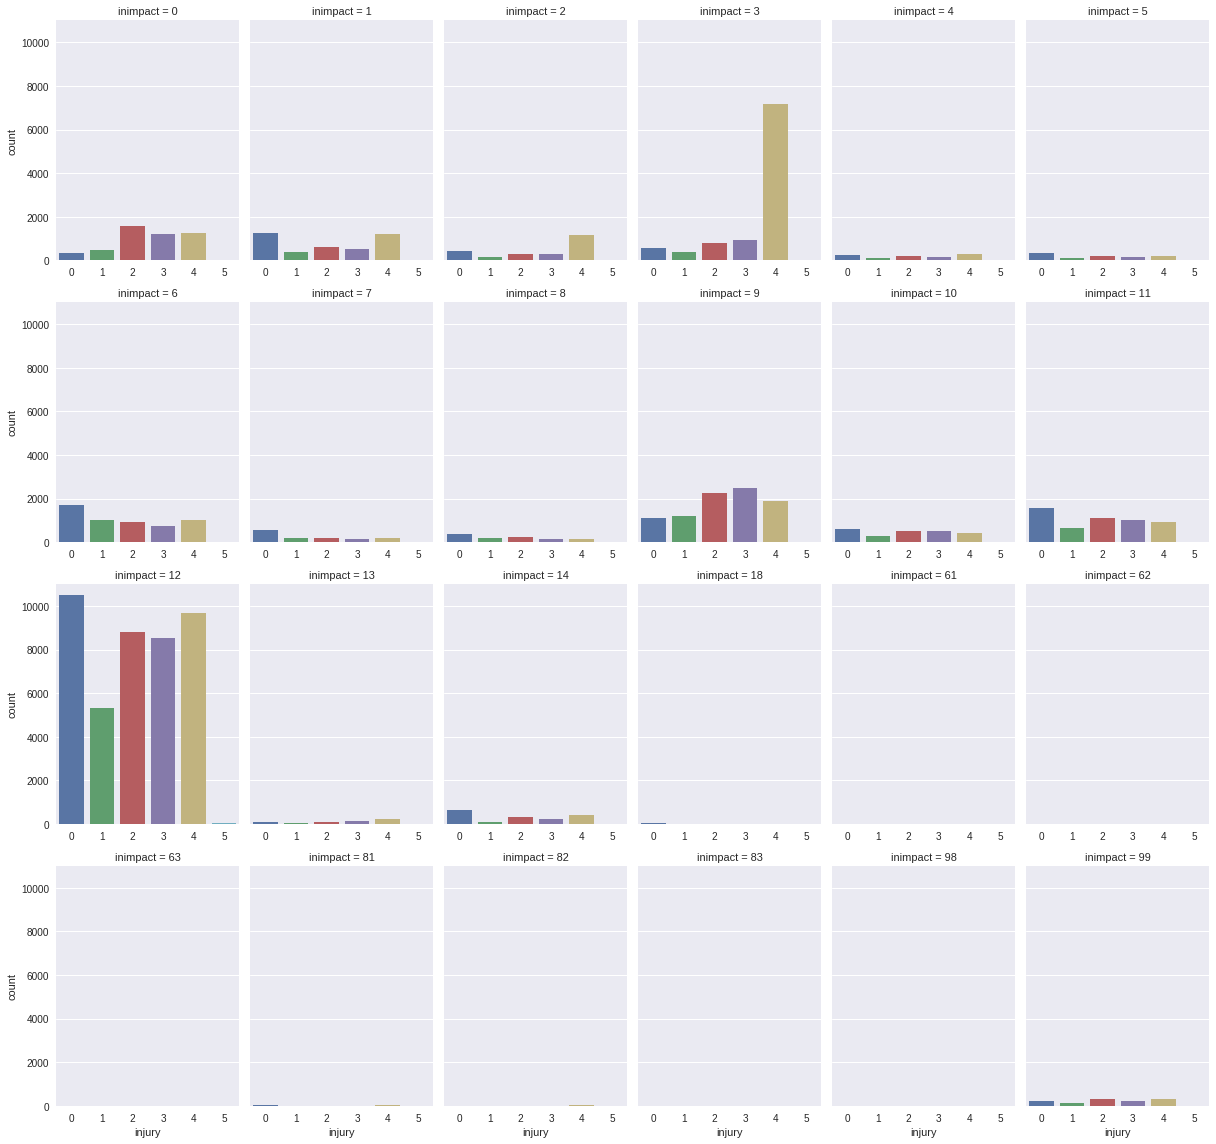

In [73]:
filter_ = (data.Restraint == 'yes')
g = sns.factorplot(x="injury",
                   col="inimpact", 
                   data=data[filter_], col_wrap=6, kind="count", size=4, aspect=0.7,
                   sharex=False
                  )

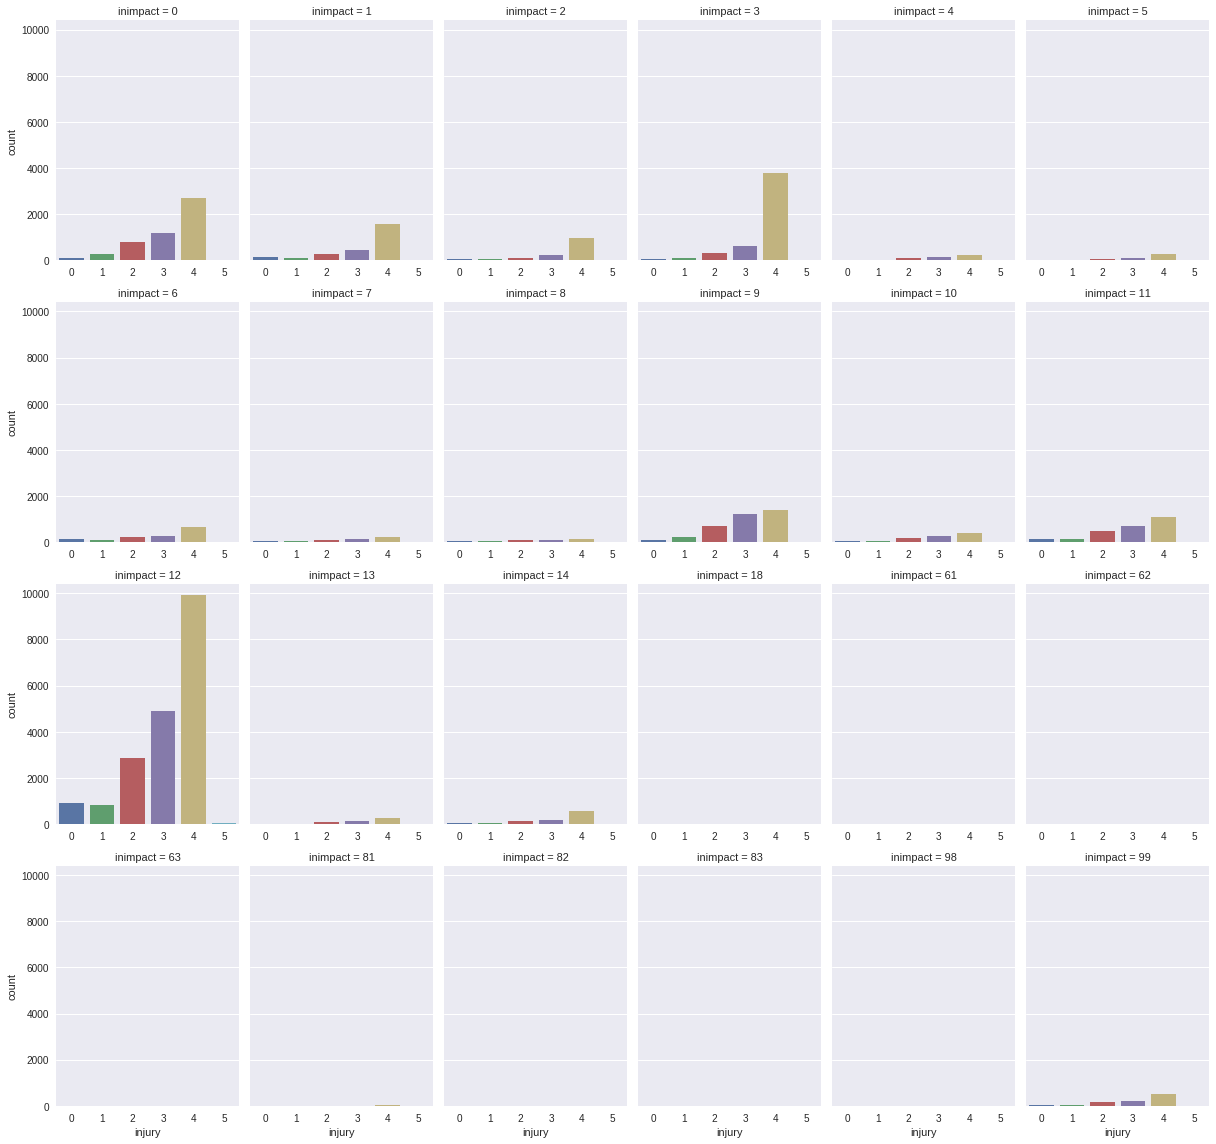

In [74]:
filter_ = (data.Restraint == 'no')
g = sns.factorplot(x="injury",
                   col="inimpact", 
                   data=data[filter_], col_wrap=6, kind="count", size=4, aspect=0.7,
                   sharex=False
                  )